# AWS Machine Learning Nanodegree Capstone Project
# Data Importing and Transformation

## Summary

### In this notebook I will import the data, create a pipeline, explore the data, and train and test one or more models. I will then evaluate the results

In [56]:
#data import
import pandas as pd
import os
import glob
import seaborn as sns

In [57]:
pd.options.display.max_rows = 100

## Data import

### In this step I am importing data into Pandas dataframes, merging the various features into a single frame and resetting the index

In [58]:
data_path = os.path.join(os.getcwd(), 'use_this_data')

In [59]:
wl_path = os.path.join(data_path, 'watchlist_01012022_10312022')
rat_path = os.path.join(data_path, 'ratios_01012022_10312022')
sq_path = os.path.join(data_path, 'stockquotes_01012022_10312022')
ss_path = os.path.join(data_path, 'shortsales_01012022_10312022')

In [60]:
wl = pd.read_parquet(wl_path, columns=['Security Code Clean', 'file_date'])
rat = pd.read_parquet(rat_path, columns=['Security Code Clean', 'file_date', 'P/E ratio', 'P/B ratio'])
#pb = pd.read_parquet(rat_path, columns=['Security Code Clean', 'file_date', 'P/B ratio'])
trade_vol = pd.read_parquet(sq_path, columns=['Security Code Clean', 'file_date', 'Trade Volume'])
close_px = pd.read_parquet(sq_path, columns=['Security Code Clean', 'file_date', 'Closing Price'])
ss_vol = pd.read_parquet(ss_path, columns=['Security Code Clean', 'file_date', 'Trading Volume'])

### Clean watchlist dataset

#### Reindex watchlist to multiindex based on closing prices, fill zeros and 1's, fill nulls, rename columns

In [6]:
len(close_px.index)

235301

In [61]:
midx2 = pd.Index(close_px[['file_date','Security Code Clean']])

In [62]:
midx2

Index([  (2022-01-03 00:00:00, '0050'),   (2022-01-03 00:00:00, '0051'),
         (2022-01-03 00:00:00, '0052'),   (2022-01-03 00:00:00, '0053'),
         (2022-01-03 00:00:00, '0054'),   (2022-01-03 00:00:00, '0055'),
         (2022-01-03 00:00:00, '0056'),   (2022-01-03 00:00:00, '0057'),
         (2022-01-03 00:00:00, '0061'), (2022-01-03 00:00:00, '006203'),
       ...
         (2022-10-31 00:00:00, '9940'),   (2022-10-31 00:00:00, '9941'),
        (2022-10-31 00:00:00, '9941A'),   (2022-10-31 00:00:00, '9942'),
         (2022-10-31 00:00:00, '9943'),   (2022-10-31 00:00:00, '9944'),
         (2022-10-31 00:00:00, '9945'),   (2022-10-31 00:00:00, '9946'),
         (2022-10-31 00:00:00, '9955'),   (2022-10-31 00:00:00, '9958')],
      dtype='object', length=235301)

In [63]:
idx = pd.IndexSlice

In [64]:
#add indicator column for whether a stock is on the list
wl['on_watchlist'] = 1

In [65]:
wl.rename(columns={'Security Code Clean':'item_id','file_date':'timestamp','on_watchlist':'target_value'}, inplace=True)

In [14]:
#there are only 22 stocks that were on the watchlist over the timespan
wl['item_id'].nunique()

22

In [15]:
watchlist_stocks = wl['item_id'].unique()

In [16]:
watchlist_stocks

array(['1213', '1418', '1472', '1512', '1538', '2025', '2321', '2364',
       '2443', '2841', '3043', '3383', '3494', '3536', '6225', '6289',
       '8101', '9928', '3229', '3018', '9110', '4414'], dtype=object)

In [66]:
wl2 = wl.set_index(['timestamp','item_id']).reindex(midx2)

In [67]:
wl2

target_value
2022-01-03 0050           NaN
           0051           NaN
           0052           NaN
           0053           NaN
           0054           NaN
...                       ...
2022-10-31 9944           NaN
           9945           NaN
           9946           NaN
           9955           NaN
           9958           NaN

[235301 rows x 1 columns]

In [68]:
wl2 = wl2.fillna(value=0)

In [69]:
wl2

target_value
2022-01-03 0050           0.0
           0051           0.0
           0052           0.0
           0053           0.0
           0054           0.0
...                       ...
2022-10-31 9944           0.0
           9945           0.0
           9946           0.0
           9955           0.0
           9958           0.0

[235301 rows x 1 columns]

### Reindex related data sets to close price multiindex, and rename columns

In [37]:
close_px.rename(columns={'Security Code Clean':'item_id', 
                           'Closing Price': 'close_px',
                            'file_date':'timestamp'}, inplace=True)

In [38]:
close_px

,item_id,timestamp,close_px
0,0050,2022-01-03,146.40
1,0051,2022-01-03,60.90
2,0052,2022-01-03,135.20
3,0053,2022-01-03,70.45
4,0054,2022-01-03,31.80
...,...,...,...
1171,9944,2022-10-31,20.40
1172,9945,2022-10-31,39.60
1173,9946,2022-10-31,11.55
1174,9955,2022-10-31,17.05


In [39]:
trade_vol.rename(columns={'Security Code Clean':'item_id', 
                           'Trade Volume': 'trade_volume',
                            'file_date':'timestamp'}, inplace=True)

In [40]:
trade_vol

,item_id,timestamp,trade_volume
0,0050,2022-01-03,7064552
1,0051,2022-01-03,135357
2,0052,2022-01-03,882163
3,0053,2022-01-03,28349
4,0054,2022-01-03,3998
...,...,...,...
1171,9944,2022-10-31,71751
1172,9945,2022-10-31,6956898
1173,9946,2022-10-31,11298
1174,9955,2022-10-31,131905


In [41]:
rat.rename(columns={'Security Code Clean':'item_id', 'P/E ratio': 'pe_ratio', 'P/B ratio':'pb_ratio', 'file_date':'timestamp'},inplace=True)

In [42]:
rat

,item_id,timestamp,pe_ratio,pb_ratio
0,1101,2022-01-03,13.91,1.49
1,1102,2022-01-03,10.09,1.03
2,1103,2022-01-03,7.29,0.51
3,1104,2022-01-03,12.78,0.75
4,1108,2022-01-03,20.52,1.06
...,...,...,...,...
960,9944,2022-10-31,4.11,0.66
961,9945,2022-10-31,5.34,2.96
962,9946,2022-10-31,18.33,0.59
963,9955,2022-10-31,NaN,1.21


In [43]:
ss_vol.rename(columns={'Security Code Clean':'item_id',
                   'Trading Volume':'ss_trading_vol',
                       'file_date':'timestamp'
                              }, inplace=True)

In [44]:
ss_vol

,item_id,timestamp,ss_trading_vol
0,0050,2022-01-03,2
1,0051,2022-01-03,0
2,0052,2022-01-03,0
3,0053,2022-01-03,0
4,0054,2022-01-03,0
...,...,...,...
1118,9944,2022-10-31,0
1119,9945,2022-10-31,173
1120,9946,2022-10-31,0
1121,9955,2022-10-31,0


In [47]:
price_based = pd.merge(left=close_px, 
                       right=rat, 
                       how='left', 
                       on=['item_id', 'timestamp'], 
                       suffixes=('_px','_rat'))

In [48]:
price_based

,item_id,timestamp,close_px,pe_ratio,pb_ratio
0,0050,2022-01-03,146.40,NaN,NaN
1,0051,2022-01-03,60.90,NaN,NaN
2,0052,2022-01-03,135.20,NaN,NaN
3,0053,2022-01-03,70.45,NaN,NaN
4,0054,2022-01-03,31.80,NaN,NaN
...,...,...,...,...,...
235296,9944,2022-10-31,20.40,4.11,0.66
235297,9945,2022-10-31,39.60,5.34,2.96
235298,9946,2022-10-31,11.55,18.33,0.59
235299,9955,2022-10-31,17.05,NaN,1.21


In [49]:
vol_based = pd.merge(left=trade_vol, 
                     right=ss_vol, 
                     how='left', 
                     on=['item_id', 'timestamp'], 
                     suffixes=('_trade', '_ss'))

In [50]:
vol_based

,item_id,timestamp,trade_volume,ss_trading_vol
0,0050,2022-01-03,7064552,2
1,0051,2022-01-03,135357,0
2,0052,2022-01-03,882163,0
3,0053,2022-01-03,28349,0
4,0054,2022-01-03,3998,0
...,...,...,...,...
235296,9944,2022-10-31,71751,0
235297,9945,2022-10-31,6956898,173
235298,9946,2022-10-31,11298,0
235299,9955,2022-10-31,131905,0


In [26]:
#all = pd.merge(left=all2, right=wl, how='left', on=['sec_code', 'file_date'], suffixes=('_sq_ss_rat', '_wl'))

In [27]:
#showing watchlist rows
#all[all['on_watchlist']==1]

,sec_code,file_date,trade_volume,closing_price,change,ss_trading_vol,ss_trading_value,pe_ratio,pb_ratio,on_watchlist
171,1213,2022-01-03,2001,8.42,0.00,0,0,NaN,1.04,1.0
221,1418,2022-01-03,71316,12.70,1.05,0,0,NaN,3.80,1.0
257,1472,2022-01-03,2,NaN,0.00,0,0,NaN,3.42,1.0
267,1512,2022-01-03,354293,4.41,0.40,0,0,NaN,12.60,1.0
290,1538,2022-01-03,59844,10.40,0.15,0,0,NaN,2.36,1.0
...,...,...,...,...,...,...,...,...,...,...
234859,3043,2022-10-31,204329,6.42,0.10,0,0,22.93,5.14,1.0
234922,3536,2022-10-31,6000,4.15,0.05,0,0,NaN,7.03,1.0
235111,6225,2022-10-31,39220,6.30,0.12,0,0,NaN,27.39,1.0
235207,8101,2022-10-31,75749,5.90,0.00,0,0,3.88,2.71,1.0


In [28]:
all

,sec_code,file_date,trade_volume,closing_price,change,ss_trading_vol,ss_trading_value,pe_ratio,pb_ratio,on_watchlist
0,0050,2022-01-03,7064552,146.40,0.90,2,292950,NaN,NaN,NaN
1,0051,2022-01-03,135357,60.90,0.10,0,0,NaN,NaN,NaN
2,0052,2022-01-03,882163,135.20,1.05,0,0,NaN,NaN,NaN
3,0053,2022-01-03,28349,70.45,0.50,0,0,NaN,NaN,NaN
4,0054,2022-01-03,3998,31.80,0.12,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
235296,9944,2022-10-31,71751,20.40,0.05,0,0,4.11,0.66,NaN
235297,9945,2022-10-31,6956898,39.60,0.40,173,6891050,5.34,2.96,NaN
235298,9946,2022-10-31,11298,11.55,0.05,0,0,18.33,0.59,NaN
235299,9955,2022-10-31,131905,17.05,0.25,0,0,NaN,1.21,NaN


In [29]:
#Investigate Nan - we can see multiple Nans indicating that not every stock has a value for all columns
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235301 entries, 0 to 235300
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sec_code          235301 non-null  object        
 1   file_date         235301 non-null  datetime64[ns]
 2   trade_volume      235301 non-null  Int64         
 3   closing_price     232340 non-null  float64       
 4   change            235301 non-null  float64       
 5   ss_trading_vol    224945 non-null  Int64         
 6   ss_trading_value  224945 non-null  Int64         
 7   pe_ratio          168174 non-null  float64       
 8   pb_ratio          194346 non-null  float64       
 9   on_watchlist      3440 non-null    float64       
dtypes: Int64(3), datetime64[ns](1), float64(5), object(1)
memory usage: 20.4+ MB


In [30]:
#count of nulls per column
print(all.isnull().sum())

sec_code                 0
file_date                0
trade_volume             0
closing_price         2961
change                   0
ss_trading_vol       10356
ss_trading_value     10356
pe_ratio             67127
pb_ratio             40955
on_watchlist        231861
dtype: int64


## EDA

### Investigate watchlist stocks

In [70]:
wl2 = wl2.reset_index().rename(columns={'level_0':'timestamp','level_1':'item_id'})

In [71]:
wl2[['item_id','timestamp','target_value']]

,item_id,timestamp,target_value
0,0050,2022-01-03,0.0
1,0051,2022-01-03,0.0
2,0052,2022-01-03,0.0
3,0053,2022-01-03,0.0
4,0054,2022-01-03,0.0
...,...,...,...
235296,9944,2022-10-31,0.0
235297,9945,2022-10-31,0.0
235298,9946,2022-10-31,0.0
235299,9955,2022-10-31,0.0


In [25]:
wl2[wl2['item_id'].isin(watchlist_stocks)]

,timestamp,item_id,target_value
171,2022-01-03,1213,1.0
221,2022-01-03,1418,1.0
257,2022-01-03,1472,1.0
267,2022-01-03,1512,1.0
290,2022-01-03,1538,1.0
...,...,...,...
234922,2022-10-31,3536,1.0
235111,2022-10-31,6225,1.0
235207,2022-10-31,8101,1.0
235256,2022-10-31,9110,1.0


In [34]:
sns.set(rc={'figure.figsize':(25,12)})

<AxesSubplot:xlabel='timestamp', ylabel='target_value'>

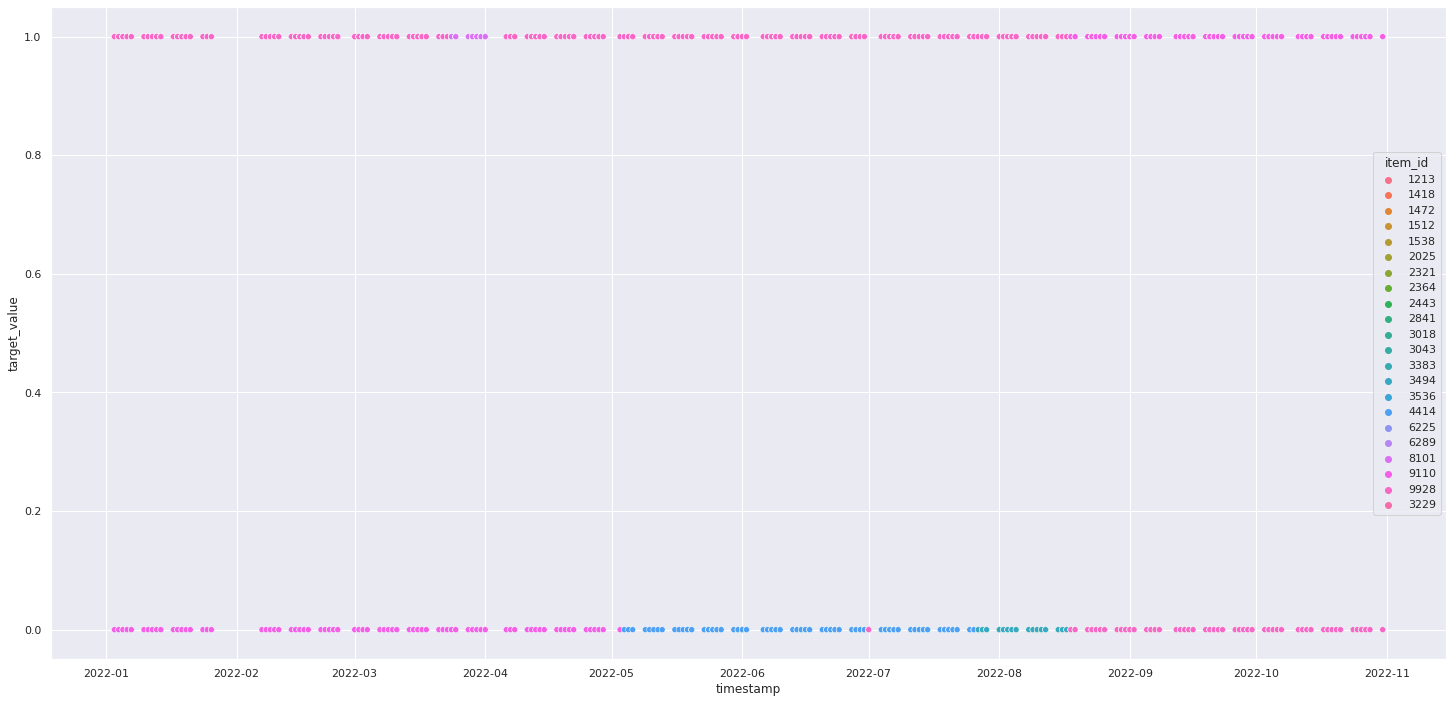

In [35]:
sns.scatterplot(data=wl2[wl2['item_id'].isin(watchlist_stocks)], x="timestamp", y="target_value", hue="item_id", )

## Export data to prepare for Amazon Forecast

In [72]:
# Forecast requires timestamps with the following format: yyyy-MM-dd hh:mm:ss
wl2['timestamp'] = wl2['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d %X"))

In [42]:
#setting index=False because Forecast cannot receive any extra attributes during import
wl2[['item_id','timestamp','target_value']].to_parquet('./forecast_import/target_wl2.parquet',index=False)

In [81]:
#for Exp 02 - drop 10/31 and predict 10/31 based on future-filled related data sets which do have 10/31 values
wl_exp02 = wl2.loc[wl2['timestamp'] != '2022-10-31 00:00:00'][['item_id','timestamp','target_value']]

In [82]:
wl_exp02.to_parquet('./forecast_import/wl_exp02.parquet',index=False)

In [53]:
vol_based.to_parquet('./forecast_import/vol_based.parquet',index=False)

In [54]:
price_based.to_parquet('./forecast_import/price_based.parquet',index=False)